In [1]:
# 二変数の線形モデルを考える
# y = 1 + 2*x1 + 3*x2
import torch
from torch.autograd import Variable as V


w_true = torch.Tensor([1, 2, 3])
# 適当に入力データを作成
X = torch.cat([torch.ones(100, 1), torch.randn(100, 2)], 1)
# 真の出力に揺らぎを与えてテストデータを作る
y = torch.mv(X, w_true) + torch.randn(100) * 0.5
X = V(X)
y = V(y)
w = V(torch.randn(3), requires_grad=True)
print(X.size())
print(y.size())
print(w.size())
gamma = 0.1

torch.Size([100, 3])
torch.Size([100])
torch.Size([3])


In [2]:
losses = []
for epoc in range(100):
    # 前回のbackwardメソッドで計算された勾配の値を削除
    w.grad = None
    # マトリクスとベクトルの掛け算
    y_pred = torch.mv(X, w)
    # 最小二乗法
    loss = torch.mean((y - y_pred) ** 2)
    loss.backward()
    # 最小二乗法のバックプロパゲートから得たwの勾配分だけ学習させる
    w.data = w.data - gamma * w.grad.data
    losses.append(loss.data[0])

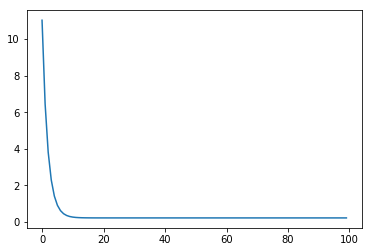

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt


plt.plot(losses)

In [4]:
# 真の係数は[1, 2, 3]
w

Variable containing:
 0.9687
 1.9258
 2.9780
[torch.FloatTensor of size 3]

In [5]:
# pytorchにビルドインされてる線形モデルと最適化法を使ってみる
from torch import nn, optim

# (3, 1)のモデル、切片をout_featureの中にいれるためbias項はなしにする
net = nn.Linear(in_features=3, out_features=1, bias=False)
# 確率的勾配降下法
optimizer = optim.SGD(net.parameters(), lr=0.1)
# 損失関数には最小二乗法をつかう
loss_fn = nn.MSELoss()

In [6]:
losses = []
for epoc in range(100):
    # 前回のbackwardメソッドで計算された勾配の値を削除
    optimizer.zero_grad()
    y_pred = net(X)
    # 損失関数を計算
    loss = loss_fn(y_pred, y)
    # バックプロパゲーション
    loss.backward()
    # 勾配を更新する
    optimizer.step()
    losses.append(loss.data[0])

In [7]:
list(net.parameters())

[Parameter containing:
  0.9687  1.9258  2.9780
 [torch.FloatTensor of size 1x3]]